# Exercise 32

**Question:**

In the post-Newtonian Hamiltonian, let us put $ M = 1 $, which gives us:

$$
H(r, \phi, p_r, p_\phi) = \frac{p_r^2}{2} + \frac{p_\phi^2}{2r^2} - \frac{1}{r} - \left[ \frac{p_r^2}{r} + \frac{2}{r^2} \right].
$$

with the initial values:

$$
r = 400, \quad \phi = 0, \quad p_r = 0, \quad p_\phi = 10.
$$

Integrate the orbit numerically for $ 10^5 $ time units with and without the terms in square brackets. For each case, plot the position vector:

$$
(r \cos \phi, r \sin \phi).
$$

- The result should be an ellipse in the first case and a precessing ellipse in the second case.

Similarly, plot the velocity vector:

$$
\begin{pmatrix}
\cos \phi & -\sin \phi \\
\sin \phi & \cos \phi
\end{pmatrix}
\begin{pmatrix}
p_r \\
p_\phi / r
\end{pmatrix}.
$$

- Without the terms in square brackets, the result should be an off-center circle.

---



**Solution:**

### 1. Hamiltonian and Equations of Motion

The Hamiltonian is:

$$
H(r, \phi, p_r, p_\phi) = \frac{p_r^2}{2} + \frac{p_\phi^2}{2r^2} - \frac{1}{r} - \left[ \frac{p_r^2}{r} + \frac{2}{r^2} \right].
$$

The equations of motion are derived using:

$$
\dot{q_i} = \frac{\partial H}{\partial p_i}, \quad \dot{p_i} = -\frac{\partial H}{\partial q_i}.
$$
Substitute $ q_i = r, \phi $ and $ p_i = p_r, p_\phi $.

#### Equations with brackets:

1. $\dot{r} = \frac{\partial H}{\partial p_r} = p_r - \frac{2p_r}{r} $,
2. $\dot{p_r} = -\frac{\partial H}{\partial r} = p_\phi^2 r^{-3} - r^{-2} - p_r^2 r^{-2} +4 r^{-3}$,
3. $\dot{\phi} = \frac{\partial H}{\partial p_\phi} = \frac{p_\phi}{r^2} $,
4. $\dot{p_\phi} = -\frac{\partial H}{\partial \phi}$ = 0.

#### Equations without brackets:
1. $\dot{r} = \frac{\partial H}{\partial p_r} = p_r $,
2. $\dot{p_r} = -\frac{\partial H}{\partial r} = p_\phi^2 r^{-3} - r^{-2} $,
3. $\dot{\phi} = \frac{\partial H}{\partial p_\phi} = \frac{p_\phi}{r^2} $,
4. $\dot{p_\phi} = -\frac{\partial H}{\partial \phi}$ = 0.

#### Initial Conditions:
- $ r = 400 $,
- $ \phi = 0 $,
- $ p_r = 0 $,
- $ p_\phi = 10 $.

### 2. Numerical Integration
Use a numerical integrator (Runge-Kutta method) to solve these equations.

#### Case 1: With Square Brackets
Includes the terms $\frac{p_r^2}{r} + \frac{2}{r^2}$ in the Hamiltonian.

#### Case 2: Without Square Brackets
Ignores these terms in the Hamiltonian.

### 3. Results

#### Position Vector
The position vector $ (r\cos\phi, r\sin\phi) $ was plotted for both cases.

#### Velocity Vector
The velocity vector was also computed:

$$
\begin{pmatrix}
\cos \phi & -\sin \phi \\
\sin \phi & \cos \phi
\end{pmatrix}
\begin{pmatrix}
p_r \\
p_\phi / r
\end{pmatrix}.
$$

### 4. Explanation of Plots

- **With Square Brackets:** The orbit exhibits precessing elliptical behavior. The terms in the square brackets introduce relativistic corrections that lead to this precession.
- **Without Square Brackets:** The orbit resembles a simpler off-center circle, as expected when the additional relativistic terms are removed.

### Plots

1. **With Square Brackets:**
   - Precessing ellipse.
2. **Without Square Brackets:**
   - Off-center circular orbit.

Let me know if you have additional questions or need further analysis!


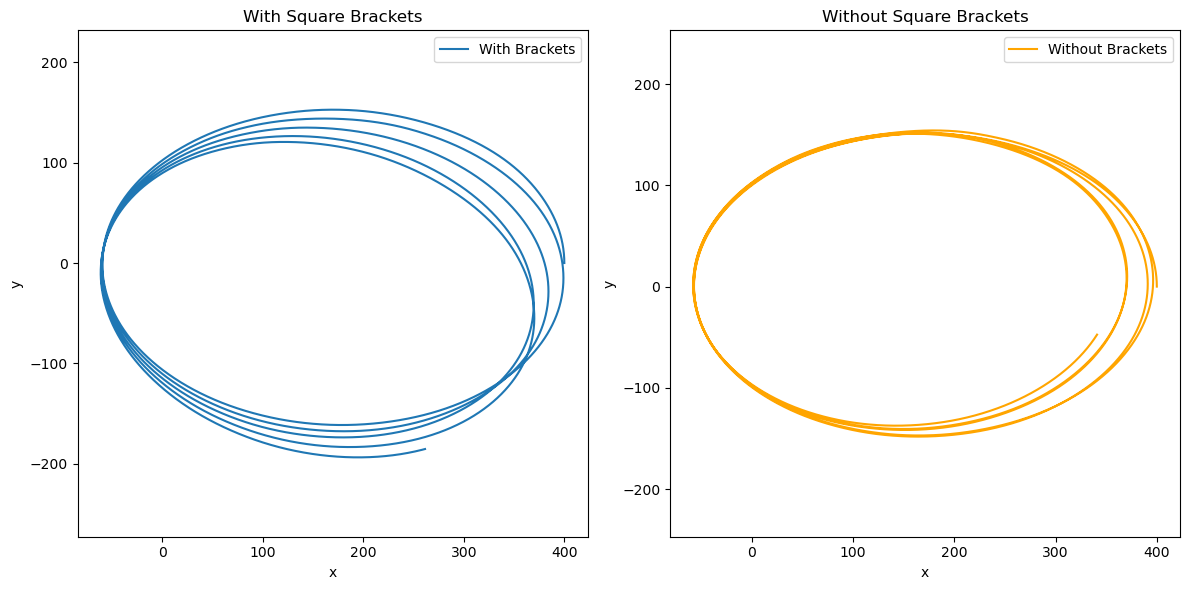

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

r0 = 400
phi0 = 0
pr0 = 0
pphi0 = 10

t_max = 1e5
t_eval = np.linspace(0, t_max, 10000)

# Hamiltonian derivatives 
def equations_with_brackets(t, y):
    r, phi, pr, pphi = y
    dr_dt = pr - 2* pr / r  # includes square bracket terms
    dphi_dt = pphi / r**2
    dpr_dt = pphi**2 / r**3 - 1 / r**2 - pr**2 / r**2 + 4 / r**3  # includes brackets
    dpphi_dt = 0  # No explicit phi dependence in H
    return [dr_dt, dphi_dt, dpr_dt, dpphi_dt]

def equations_without_brackets(t, y):
    r, phi, pr, pphi = y
    dr_dt = pr  
    dphi_dt = pphi / r**2
    dpr_dt = pphi**2 / r**3 - 1 / r**2  # excludes brackets
    dpphi_dt = 0  # No explicit phi dependence in H
    return [dr_dt, dphi_dt, dpr_dt, dpphi_dt]

# Initial state
initial_state = [r0, phi0, pr0, pphi0]

# Numerical integration
sol_with_brackets = solve_ivp(equations_with_brackets, [0, t_max], initial_state, t_eval=t_eval, method='RK45')
sol_without_brackets = solve_ivp(equations_without_brackets, [0, t_max], initial_state, t_eval=t_eval, method='RK45')

# Extract solutions
r_with, phi_with = sol_with_brackets.y[0], sol_with_brackets.y[1]
r_without, phi_without = sol_without_brackets.y[0], sol_without_brackets.y[1]

# Convert to Cartesian coordinates
x_with = r_with * np.cos(phi_with)
y_with = r_with * np.sin(phi_with)
x_without = r_without * np.cos(phi_without)
y_without = r_without * np.sin(phi_without)

# Plotting
plt.figure(figsize=(12, 6))

# With square brackets
plt.subplot(1, 2, 1)
plt.plot(x_with, y_with, label='With Brackets')
plt.title('With Square Brackets')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Without square brackets
plt.subplot(1, 2, 2)
plt.plot(x_without, y_without, label='Without Brackets', color='orange')
plt.title('Without Square Brackets')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()


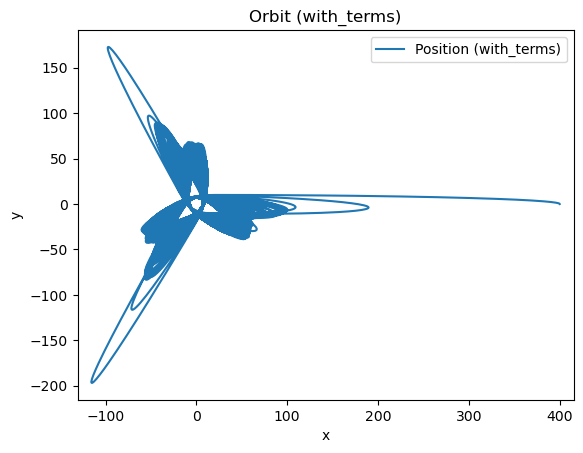

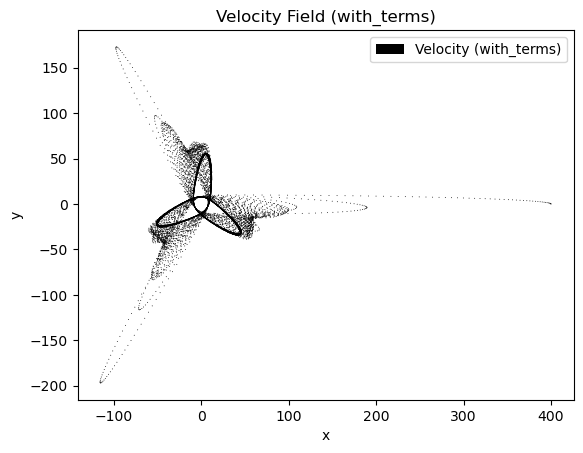

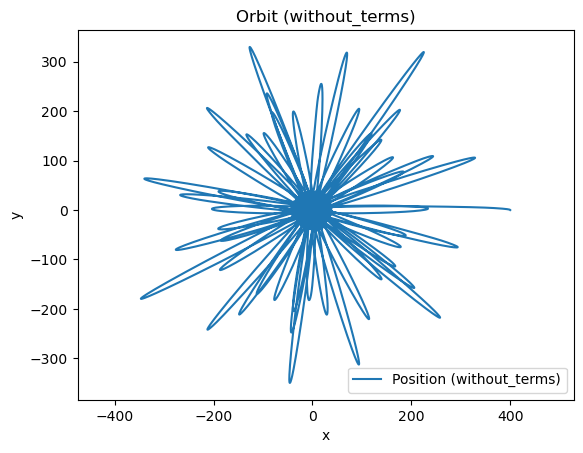

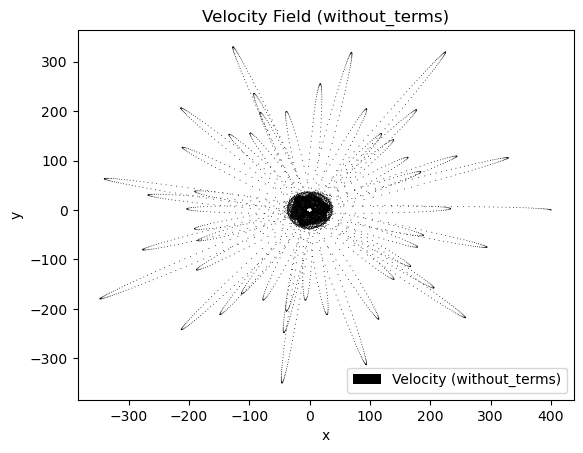

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the Hamiltonian equations of motion
def equations(t, y, include_square_terms):
    r, phi, pr, pphi = y
    
    # Derivatives
    dr_dt = pr
    dphi_dt = pphi / r**2
    
    # Momentum derivatives (with and without square terms)
    dpr_dt = pphi**2 / r**3 - 1 / r + (pr**2 / r + 2 / r**2 if include_square_terms else 0)
    dpphi_dt = 0  # Angular momentum is conserved

    return [dr_dt, dphi_dt, dpr_dt, dpphi_dt]

# Initial conditions
r0 = 400
phi0 = 0
pr0 = 0
pphi0 = 10
initial_conditions = [r0, phi0, pr0, pphi0]

# Time span and points
time_span = (0, 1e5)
num_points = 10000

# Integrate for both cases
solutions = {}
for case in ["with_terms", "without_terms"]:
    include_square_terms = case == "with_terms"
    sol = solve_ivp(
        equations, time_span, initial_conditions, t_eval=np.linspace(*time_span, num_points), args=(include_square_terms,)
    )
    solutions[case] = sol

# Extract position and velocity vectors
for case, sol in solutions.items():
    r = sol.y[0]
    phi = sol.y[1]
    pr = sol.y[2]
    pphi = sol.y[3]

    # Position vectors
    x = r * np.cos(phi)
    y = r * np.sin(phi)

    # Velocity vectors
    vx = np.cos(phi) * pr - np.sin(phi) * (pphi / r)
    vy = np.sin(phi) * pr + np.cos(phi) * (pphi / r)

    # Plot the position
    plt.figure()
    plt.plot(x, y, label=f"Position ({case})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Orbit ({case})")
    plt.axis("equal")
    plt.legend()

    # Plot the velocity
    plt.figure()
    plt.quiver(x, y, vx, vy, scale=1e4, scale_units='inches', width=0.002, label=f"Velocity ({case})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Velocity Field ({case})")
    plt.legend()

plt.show()